In [1]:
#importing some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
#reading the dataset
df = pd.read_csv('car_data.csv')

In [3]:
df.shape

(157, 23)

In [4]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor', 'mpg',
       'cylinders', 'displacement', 'weight', 'acceleration', 'model year',
       'origin'],
      dtype='object')

Dealing with Null values

In [5]:
#Let's drop the attributes which are not necessary to our predicition
df=df.drop(["Manufacturer","Sales_in_thousands","Power_perf_factor","Vehicle_type","Curb_weight","__year_resale_value","Latest_Launch","mpg","cylinders","displacement","weight","acceleration","model year","origin"],axis=1)

In [6]:
# checking the null values
df.isna().sum()

Model                 0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Fuel_capacity         1
Fuel_efficiency       3
dtype: int64

In [7]:
# Now fill the null values with mean
df["Price_in_thousands"].fillna(value=df["Price_in_thousands"].mean(),inplace=True)
df["Engine_size"].fillna(value=df["Engine_size"].mean(),inplace=True)
df["Horsepower"].fillna(value=df["Horsepower"].mean(),inplace=True)
df["Wheelbase"].fillna(value=df["Wheelbase"].mean(),inplace=True)
df["Width"].fillna(value=df["Width"].mean(),inplace=True)
df["Length"].fillna(value=df["Length"].mean(),inplace=True)
df["Fuel_capacity"].fillna(value=df["Fuel_capacity"].mean(),inplace=True)
df['Fuel_efficiency'].fillna(value=df['Fuel_efficiency'].mean(),inplace=True)

In [8]:
df

,Model,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency
0,Integra,21.500000,1.8,140.0,101.2,67.3,172.4,13.2,28.0
1,TL,28.400000,3.2,225.0,108.1,70.3,192.9,17.2,25.0
2,CL,27.390755,3.2,225.0,106.9,70.6,192.0,17.2,26.0
3,RL,42.000000,3.5,210.0,114.6,71.4,196.6,18.0,22.0
4,A4,23.990000,1.8,150.0,102.6,68.2,178.0,16.4,27.0
...,...,...,...,...,...,...,...,...,...
152,V40,24.400000,1.9,160.0,100.5,67.6,176.6,15.8,25.0
153,S70,27.500000,2.4,168.0,104.9,69.3,185.9,17.9,25.0
154,V70,28.800000,2.4,168.0,104.9,69.3,186.2,17.9,25.0
155,C70,45.500000,2.3,236.0,104.9,71.5,185.7,18.5,23.0


In [9]:
#Here converting categorical values to integers
#Here I am ordering the model by counting and make it dictionary using model as key and encoded values
encoded_model = {k:v for v,k in enumerate(df.Model.value_counts().sort_values().index,0)}
encoded_model

{'Eclipse': 0,
 'Catera': 1,
 'CL': 2,
 'RL': 3,
 'A4': 4,
 'A6': 5,
 'A8': 6,
 '323i': 7,
 '328i': 8,
 '528i': 9,
 'Century': 10,
 'Regal': 11,
 'Park Avenue': 12,
 'LeSabre': 13,
 'DeVille': 14,
 'Seville': 15,
 'Escalade': 16,
 'Cavalier': 17,
 'Malibu': 18,
 'Stratus': 19,
 'Sebring Coupe': 20,
 'Lumina': 21,
 'Monte Carlo': 22,
 'Camaro': 23,
 'Corvette': 24,
 'Prizm': 25,
 'Metro': 26,
 'Eldorado': 27,
 'Impala': 28,
 'Viper': 29,
 'Concorde': 30,
 'Cirrus': 31,
 'LHS': 32,
 'Town & Country': 33,
 '300M': 34,
 'Avenger': 35,
 'Sebring Conv.': 36,
 'TL': 37,
 'Intrepid': 38,
 'Town car': 39,
 'Civic': 40,
 'Ram Van': 41,
 'Dakota': 42,
 'Durango': 43,
 'Caravan': 44,
 'Escort': 45,
 'Mustang': 46,
 'Contour': 47,
 'Taurus': 48,
 'Focus': 49,
 'Crown Victoria': 50,
 'Explorer': 51,
 'Windstar': 52,
 'Expedition': 53,
 'Ranger': 54,
 'Accord': 55,
 'CR-V': 56,
 'Passport': 57,
 'Continental': 58,
 'Cherokee': 59,
 'Odyssey': 60,
 'Accent': 61,
 'Elantra': 62,
 'Sonata': 63,
 'I30': 

In [10]:
#now map the car models name with encoded values 
df.Model = df.Model.map(encoded_model)

Exploring every feature

In [11]:
#sorting the values in column of fuel efficiency in descending order
df_sort = df.sort_values(by='Fuel_efficiency',ascending = False)
df_sort.head(9)

,Model,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency
26,26,9.235,1.0,55.0,93.1,62.6,149.4,10.3,45.0
25,25,13.960,1.8,120.0,97.1,66.7,174.3,13.2,33.0
136,119,13.108,1.8,120.0,97.0,66.7,174.0,13.2,33.0
130,129,12.535,1.9,100.0,102.4,66.4,180.0,12.1,33.0
129,128,10.685,1.9,100.0,102.4,66.4,176.9,12.1,33.0
57,40,12.885,1.6,106.0,103.2,67.1,175.1,11.9,32.0
139,136,16.875,1.8,140.0,102.4,68.3,170.5,14.5,31.0
62,61,9.699,1.5,92.0,96.1,65.7,166.7,11.9,31.0
131,130,14.290,1.9,124.0,102.4,66.4,176.9,12.1,31.0


(array([ 2., 27., 44., 43., 22., 10.,  7.,  1.,  0.,  1.]),
 array([ 55. ,  94.5, 134. , 173.5, 213. , 252.5, 292. , 331.5, 371. ,
        410.5, 450. ]),
 <BarContainer object of 10 artists>)

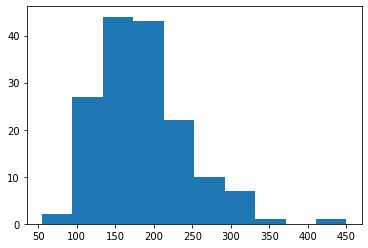

In [12]:
#The distribution of horsepower data
plt.hist(df['Horsepower'],10)

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


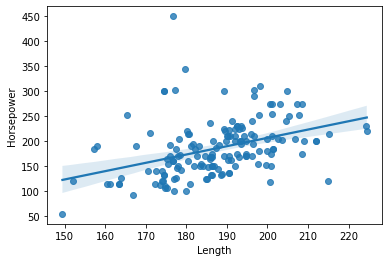

In [13]:
#The relation among length and horse power of the car
sns.regplot(df['Length'],df['Horsepower']);

Dealing with skewness

In [14]:
from scipy.stats import skew

Model
-0.0008120750860142306


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


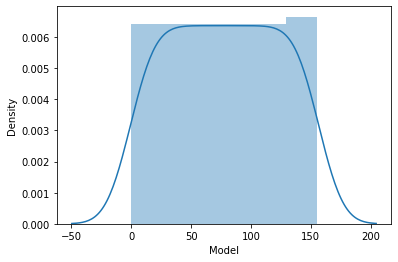

Price_in_thousands
1.7598455708699938


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


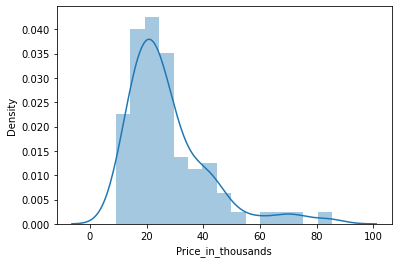

Engine_size
1.0933252193115957


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


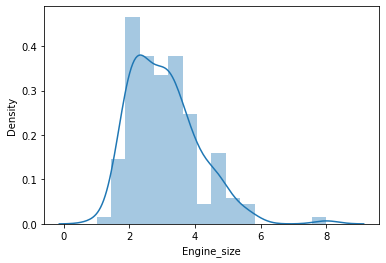

Horsepower
0.9942184675331993


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


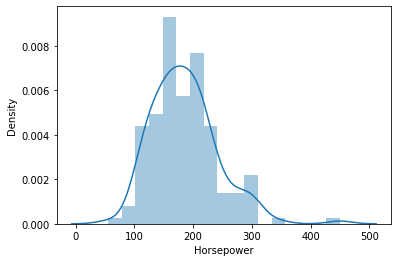

Wheelbase
0.9636582075665935


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


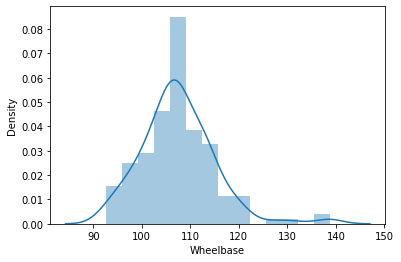

Width
0.4807305013986908


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


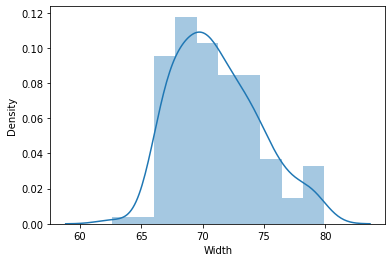

Length
-0.05866467047732647


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


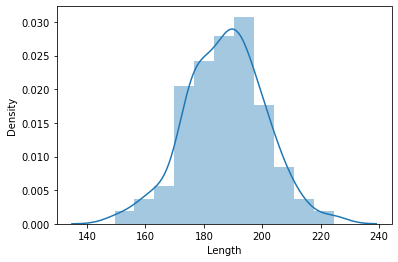

Fuel_capacity
1.1293555731825977


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


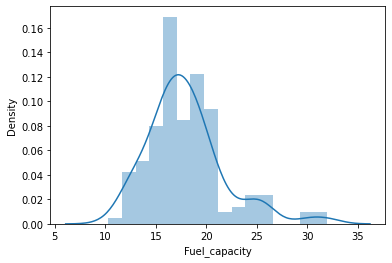

Fuel_efficiency
0.69221135876881


C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


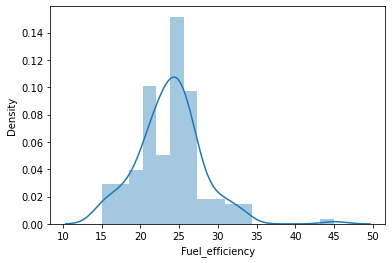

In [15]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

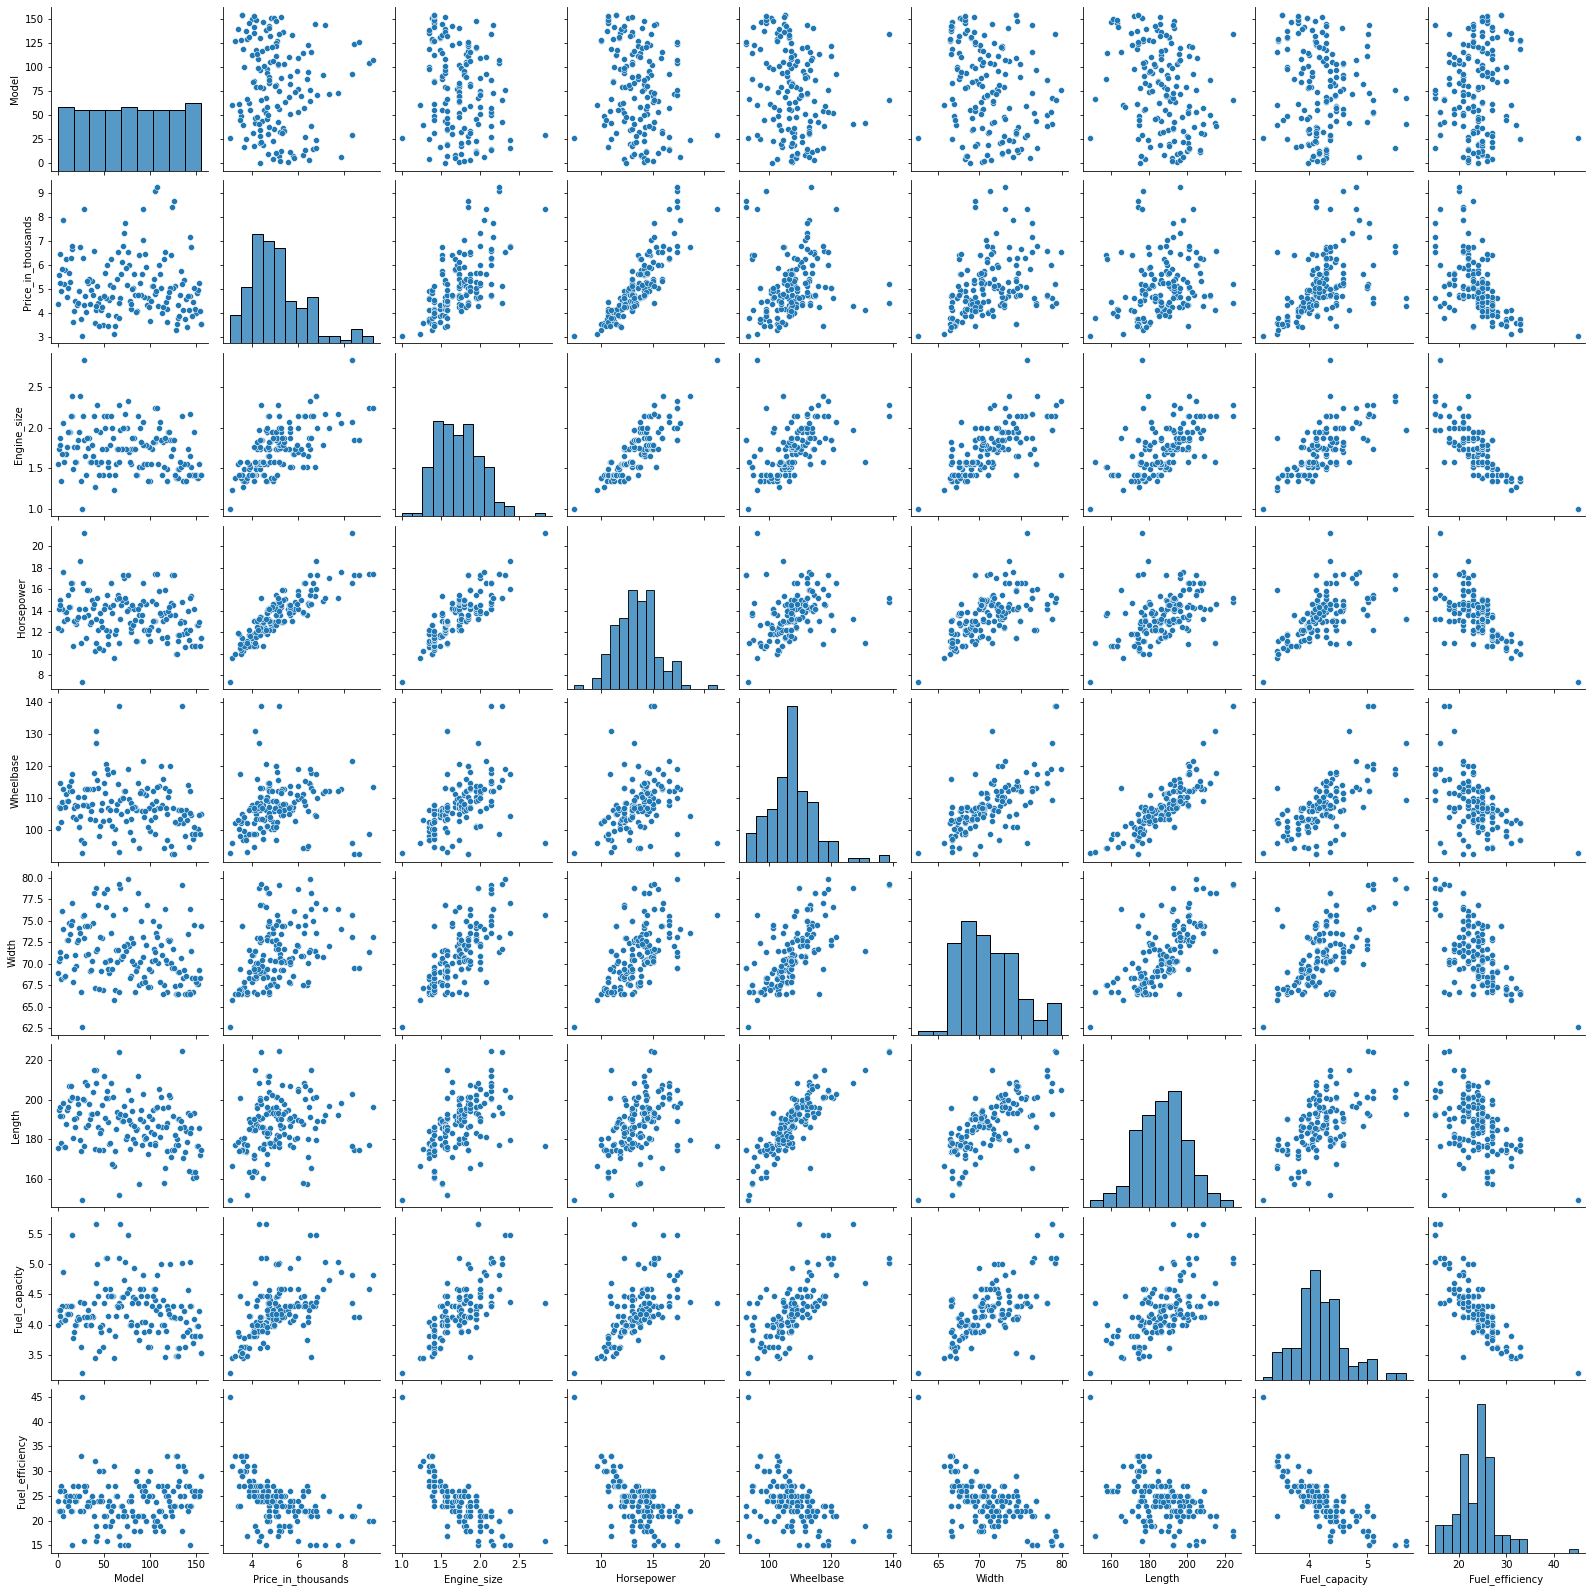

In [38]:
sns.pairplot(df)

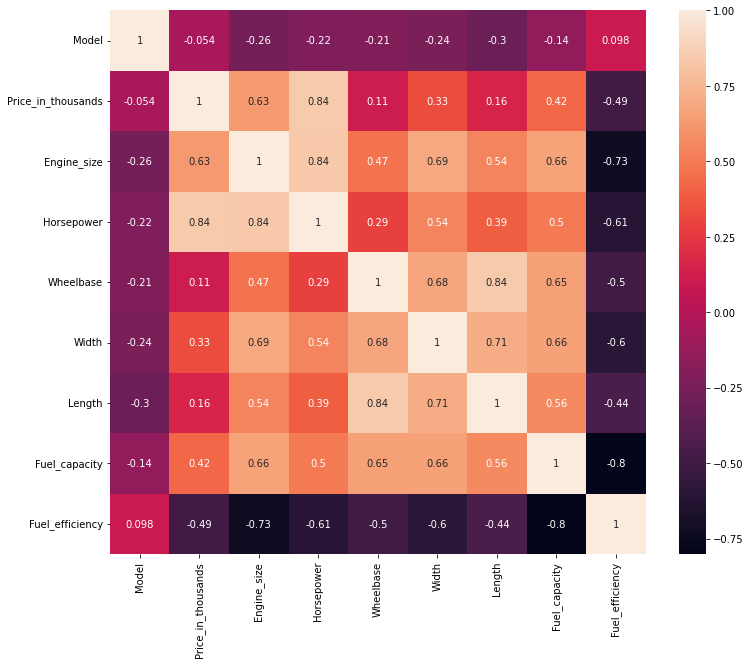

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Now,removing the positive skewness

In [17]:
df["Engine_size"]=np.sqrt(df["Engine_size"])
skew(df["Engine_size"])

0.545239605686732

In [18]:
df["Price_in_thousands"]=np.sqrt(df["Price_in_thousands"])
skew(df["Price_in_thousands"])

1.085157906506352

In [19]:
df["Horsepower"]=np.sqrt(df["Horsepower"])
skew(df["Horsepower"])

0.39405191401112644

In [20]:
df["Fuel_capacity"]=np.sqrt(df["Fuel_capacity"])
skew(df["Fuel_capacity"])

0.7415941888170683

Checking for outliers

In [21]:
df["Price_in_thousands"].describe()

count    157.000000
mean       5.089075
std        1.225414
min        3.038914
25%        4.259695
50%        4.837355
75%        5.650664
max        9.246621
Name: Price_in_thousands, dtype: float64

(array([14., 27., 40., 31., 15., 17.,  5.,  2.,  3.,  3.]),
 array([3.03891428, 3.65968495, 4.28045562, 4.9012263 , 5.52199697,
        6.14276764, 6.76353831, 7.38430899, 8.00507966, 8.62585033,
        9.246621  ]),
 <BarContainer object of 10 artists>)

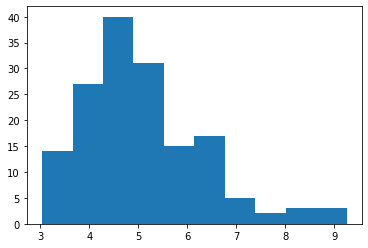

In [22]:
plt.hist(df.Price_in_thousands)

In [23]:
#we have 156 unique names of car models 
df.Model.nunique()

156

In [24]:
#there is no null values in car models column
df.Model.isna().sum()

0

In [25]:
df=df.sort_values(["Engine_size","Horsepower","Wheelbase","Width","Length","Fuel_capacity","Fuel_efficiency"]).reset_index(drop=True)

In [26]:
#checking the correlation with our target variables
df.corr()['Price_in_thousands']

Model                -0.076697
Price_in_thousands    1.000000
Engine_size           0.657312
Horsepower            0.863094
Wheelbase             0.156486
Width                 0.372531
Length                0.204981
Fuel_capacity         0.485912
Fuel_efficiency      -0.543127
Name: Price_in_thousands, dtype: float64

Let build the model

In [27]:
#Here my goal is to predict price of a car therefore,my target variable is price_in_thousands
x=df.drop(["Price_in_thousands"],axis=1)
y=df["Price_in_thousands"]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

standardization

In [29]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

Model Training

In [30]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

In [31]:
def perfect_model(X, y):
    model_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {}
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(random_state=22),
            'params': {
                'criterion': ['squared_error','friedman_mse','absolute_error'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,20,5)],
                'min_samples_leaf': [1, 2, 5]
            }
        },

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': np.random.randint(20,151,size=5),
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10,100],
                'min_samples_leaf': [1, 2]
            }
        }
    }
  
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=3)
        rs.fit(x_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [32]:
perfect_model(x,y)

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{}, {'splitter': 'random', 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'absolute_error'}, {'n_estimators': 103, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}]


,model,best_score,best_params
0,Linear_Regression,0.739218,{}
1,Decision_Tree,0.603028,"{'splitter': 'random', 'min_samples_leaf': 5, ..."
2,Random_forest,0.727751,"{'n_estimators': 103, 'min_samples_split': 10,..."


In [33]:
final_dec_model = DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=20, criterion='absolute_error')
final_dec_model.fit(x_train,y_train)
final_dec_model.score(x_test,y_test)

0.7818725065876907

In [43]:
final_rf_model = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=20)
final_rf_model.fit(x_train,y_train)
final_rf_model.score(x_test,y_test)

0.8230717121124997

In [39]:
final_lr_model = LinearRegression()
final_lr_model.fit(x_train,y_train)
final_lr_model.score(x_test,y_test)

0.8152168605763175

- I got 82% accuracy with LinearRegression model
- I am taking Linear Regression model as my final model

In [36]:
def prediction(Model,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_capacity,Fuel_efficiency):
    X_pred = np.zeros(8)
    X_pred[0]=encoded_model[Model]
    X_pred[1]=Engine_size
    X_pred[2]=Horsepower
    X_pred[3]=Wheelbase
    X_pred[4]=Width
    X_pred[5]=Length
    X_pred[6]=Fuel_capacity
    X_pred[7]=Fuel_efficiency
    X_pred = scaler.transform([X_pred])
    prediction = final_lr_model.predict(X_pred)
    return prediction

In [37]:
prediction("A4",2.5,145,108,75,175,12,28)

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([89.34648541])

In [40]:

import pickle 
with open('price_prediction_model.pickle','wb') as f:
    pickle.dump(final_lr_model,f)
import pickle
with open('scaler_price.pickle',"wb") as f:
    pickle.dump(scaler,f)